# Machine Learning Workshop

# Linear Regression

## 1. Exploratory Data Analysis

In [5]:
import pandas as pd

songs = pd.read_csv("data/songs.csv")
songs.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
(
    songs
    .corr()
    .target
    .sort_values(ascending=False)
)

# No variables show much correlation to the response, target.

target              1.000000
danceability        0.176706
speechiness         0.154006
instrumentalness    0.152594
duration_ms         0.146749
valence             0.107930
time_signature      0.040182
energy              0.039688
tempo               0.034732
key                 0.033594
liveness            0.026364
loudness           -0.072000
mode               -0.072336
acousticness       -0.129627
Unnamed: 0         -0.865969
Name: target, dtype: float64

Text(0.5, 0.98, 'Histograms')

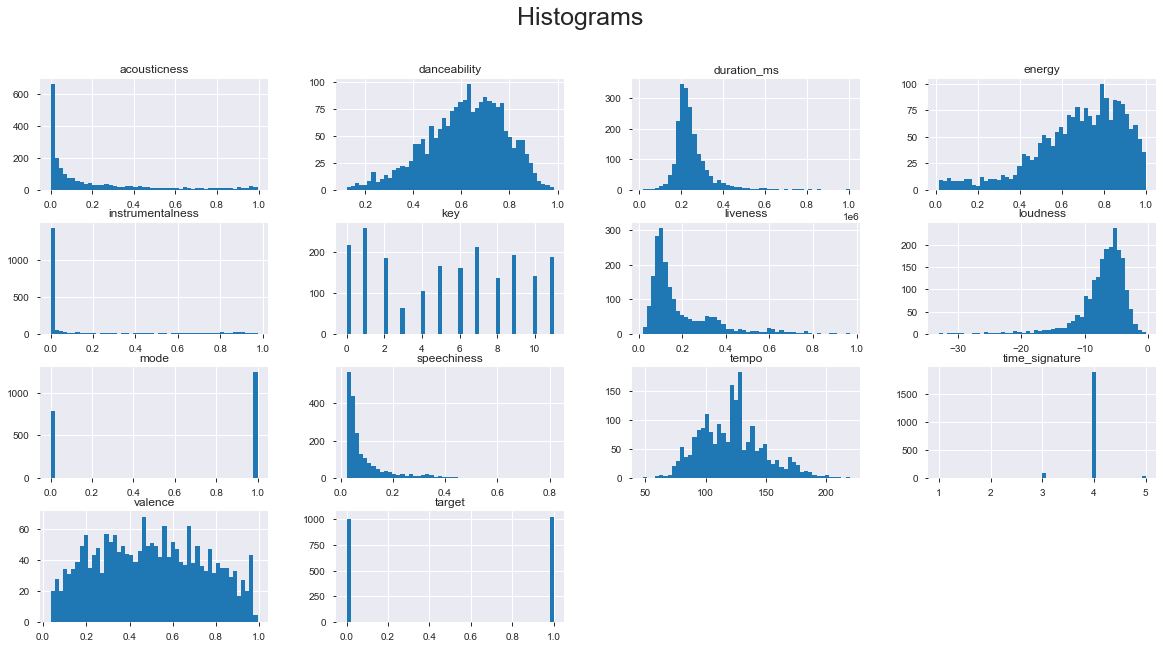

In [7]:
import numpy as np
songs_clean = songs.select_dtypes(include=np.number)

%matplotlib inline
import matplotlib.pyplot as plt
songs_num.drop(columns='Unnamed: 0').hist(bins = 50, figsize = (20, 10))
plt.suptitle("Histograms", fontsize = 25)

In [4]:
import pandas_profiling

pandas_profiling.ProfileReport(songs)

# No missing cells!
# No variables that overly stand out in terms of correlation to the target

TypeError: concat() got an unexpected keyword argument 'join_axes'

## 2. Feature Engineering & Selection

* which variables to use?
* Do you want to do any feature engineering?

In [10]:
# song_title and artist can be removed as these are very unique and would form an excess of dummy variables
# Unnamed:0 is just another index so we will remove this variable too.

In [14]:
# Find the names of the variables to drop
list(songs.columns)

['Unnamed: 0',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target',
 'song_title',
 'artist']

In [70]:
# Drop the columns which are identified above
songs_clean = songs.drop(columns = ["Unnamed: 0", "song_title", "artist"])

In [71]:
songs_clean.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [25]:
# Check for missing values
songs_clean.isna().sum()

# We have no missing values here!!!

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
dtype: int64

## 3. Model Building

### Splitting into Test and Train

In [72]:
# Separating the predictors and response variables
songs_predictors = songs_clean.drop(columns = "target")
songs_response = songs_clean["target"]

In [73]:
# Test and Train Split

from sklearn.model_selection import train_test_split

songs_pred_train, songs_pred_test, songs_resp_train, songs_resp_test = (
    train_test_split(
        songs_predictors, 
        songs_response, 
        test_size = 0.1, 
        random_state = 42
    )
)

In [29]:
# Response
songs_response

# We can see the response variable is binary as expected
# songs_response.unique()

array([1, 0], dtype=int64)

### Scaling Features


In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
songs_pred_train = ss.fit_transform(songs_pred_train)
songs_pred_test = ss.transform(songs_pred_test)
songs_pred_train

NameError: name 'songs_pred_train' is not defined

### Model Building

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
model.fit(songs_pred_train, songs_resp_train)
scores = cross_val_score(
    model, songs_pred_train, songs_resp_train, scoring='accuracy', cv=10
)
scores

# Accuracy scores show that the model is not much better than flipping a coin

NameError: name 'songs_pred_train' is not defined

In [10]:
# Train Accuracy
print(model.score(songs_pred_train, songs_resp_train))
print(np.mean(scores))

NameError: name 'songs_pred_train' is not defined

In [11]:
# Test R Squared
model.score(songs_pred_test, songs_resp_test)

# score - R squared

NameError: name 'songs_pred_test' is not defined

### Obtaining ROC and AUC

In [60]:
pred_test = model.predict_proba(songs_pred_test)
pred_test

array([[0.29806421, 0.70193579],
       [0.29658964, 0.70341036],
       [0.46786015, 0.53213985],
       [0.79793759, 0.20206241],
       [0.45579222, 0.54420778],
       [0.62794466, 0.37205534],
       [0.38591585, 0.61408415],
       [0.29388682, 0.70611318],
       [0.52494127, 0.47505873],
       [0.61589564, 0.38410436],
       [0.41736069, 0.58263931],
       [0.64637721, 0.35362279],
       [0.49712089, 0.50287911],
       [0.4001475 , 0.5998525 ],
       [0.58077068, 0.41922932],
       [0.30146222, 0.69853778],
       [0.56036711, 0.43963289],
       [0.64305836, 0.35694164],
       [0.44251856, 0.55748144],
       [0.4397899 , 0.5602101 ],
       [0.85822571, 0.14177429],
       [0.36633781, 0.63366219],
       [0.28406396, 0.71593604],
       [0.64621653, 0.35378347],
       [0.30036088, 0.69963912],
       [0.61364589, 0.38635411],
       [0.46629793, 0.53370207],
       [0.63230206, 0.36769794],
       [0.44005405, 0.55994595],
       [0.77895576, 0.22104424],
       [0.

In [61]:
pred_test = pred_test[:, 1]
pred_test

array([0.70193579, 0.70341036, 0.53213985, 0.20206241, 0.54420778,
       0.37205534, 0.61408415, 0.70611318, 0.47505873, 0.38410436,
       0.58263931, 0.35362279, 0.50287911, 0.5998525 , 0.41922932,
       0.69853778, 0.43963289, 0.35694164, 0.55748144, 0.5602101 ,
       0.14177429, 0.63366219, 0.71593604, 0.35378347, 0.69963912,
       0.38635411, 0.53370207, 0.36769794, 0.55994595, 0.22104424,
       0.18335359, 0.3681943 , 0.55683558, 0.57456792, 0.70234656,
       0.42514196, 0.62995124, 0.66529848, 0.8445883 , 0.66228619,
       0.75054321, 0.4975938 , 0.58388671, 0.68518579, 0.88515842,
       0.45423755, 0.55151891, 0.47547985, 0.29211868, 0.49228283,
       0.4247961 , 0.39695486, 0.63533235, 0.43684779, 0.39431563,
       0.4401471 , 0.81541593, 0.31514265, 0.31374113, 0.31331425,
       0.64915321, 0.48308971, 0.35080406, 0.55523708, 0.1525563 ,
       0.54172094, 0.64072352, 0.40856754, 0.46883988, 0.74489726,
       0.53929319, 0.6451489 , 0.47989518, 0.57898253, 0.30178

In [63]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true = songs_resp_test, y_score = pred_test)

# Slightly better than flipping a coin

0.6786031370227879

# Random Forests

### 1. Making a Random Forest Model

In [74]:
from sklearn.ensemble import RandomForestClassifier

# run the model with 100 trees
model_rf = RandomForestClassifier(n_estimators = 100)

# train the model on the training data
model_rf.fit(songs_pred_train, songs_resp_train)

RandomForestClassifier()

### 2. Exploring the Accuracy

In [75]:
scores = cross_val_score(
    model, songs_pred_train, songs_resp_train, scoring='accuracy', cv=10
)
np.mean(scores)

# Its not actually better than the logistic regression

0.5107431242790359

### 3. Visualisation

In [77]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# create a list with names of predictors, and an array with target categories for plotting
songs_pred_names = list(songs_pred_test)
songs_resp_names = ['0', '1']

# set the figure size
fig = plt.figure(figsize=(15, 10))

# plot the decision tree
plot_tree(model_rf.estimators_[0], # Pull out one tree from the forest
          max_depth = 2, # will freeze if we try plot all of it!
          feature_names = songs_pred_names,
          class_names = songs_resp_names, 
          filled=True);